<a href="https://colab.research.google.com/github/Athaa25/Mata-Kuliah-AI/blob/main/Another_copy_of_Bismillah_Tubes_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Penyakit Kardiovaskular Menggunakan **Algoritma Decision Tree**
## Tugas Besar Mata Kuluah Kecerdasan Buatan IT 05-01

### Nama Kelompok

1.   Maharani Febhi Atha Ningrum
2.   Adinda Mariasti Dewi
3.   Cisa Valentino Cahya Ramadhani



# 1. Pendahuluan
Penyakit kardiovaskular (CVD) adalah penyebab kematian nomor 1 di dunia, dengan estimasi 17,9 juta jiwa tiap tahun, yang tercatat sebesar 31% dari seluruh kematian di dunia. Empat dari lima kematian akibat CVD disebabkan oleh serangan jantung dan stroke, dan satu - tiga dari kematian tersebut terjadi secara cepat pada orang di bawah usia 70 tahun. Gagal jantung merupakan kejadian umum yang disebabkan oleh CVD dan dataset ini mengandung 11 fitur yang dapat digunakan untuk memprediksi kemungkinan terkena penyakit jantung.

Orang dengan penyakit kardiovaskular atau orang dengan risiko kardiovaskular tinggi (disebabkan oleh adanya satu atau lebih faktor seperti hipertensi, diabetes, hiperlipidemia, atau telah memiliki penyakit) membutuhkan deteksi dini dan penanganan dimana sebuah model pemelajaran mesin dapat menjadi bantuan yang baik.

# Import Library

In [ ]:
# Import Library yang Diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import  ConfusionMatrix

# Exploratory Data Analysis (EDA)

## Membaca Dataset

Informasi Atribut:

- Age (Usia): Fitur ini merujuk pada usia pasien dalam tahun.
- Sex (Jenis Kelamin): Fitur ini menunjukkan jenis kelamin pasien, apakah laki-laki (M) atau perempuan (L).
- ChestPainType (Tipe Nyeri Dada): Fitur ini mengklasifikasikan tipe nyeri dada yang dialami pasien, seperti Angina Khas (TA), Angina Atipikal (ATA), Nyeri Non-Anginal (NAP), atau Tanpa Gejala (ASY).
- RestingBP (Tekanan Darah Istirahat): Fitur ini menyatakan tekanan darah pasien saat istirahat dalam mm Hg.
- Cholesterol (Kolesterol Serum): Fitur ini menunjukkan kadar kolesterol pasien dalam mg/dl.
- FastingBS: gula darah puasa [1: jika FastingBS > 120 mg/dl, 0: sebaliknya]
- RestingECG (Hasil Elektrokardiogram Istirahat): Fitur ini menunjukkan hasil elektrokardiogram (EKG) pasien saat istirahat [Normal: Normal, ST: mengalami kelainan gelombang ST-T (inversi gelombang T dan/atau elevasi atau depresi ST > 0,05 mV), LVH: menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri menurut kriteria Estes]
- ExerciseAngina (Angina Akibat Olahraga): Fitur ini menunjukkan apakah pasien mengalami angina (nyeri dada) saat melakukan latihan [Y: Ya, N: Tidak]
- Oldpeak (Nilai Puncak ST Depresi): Fitur ini menyatakan nilai numerik depresi segmen ST (kekurangan suplai darah ke otot jantung).
- ST_Slope (Kemiringan Puncak Segmen ST): Fitur ini menggambarkan kemiringan puncak segmen ST pada EKG saat latihan, yang dapat menanjak(Up), datar(Flat), atau menurun(Down).
 [Nilai numerik diukur dalam depresi]
- HeartDisease: kelas output [1: Memiliki Penyakit kardiovaskular, 0: Tidak Memiliki  Penyakit kardiovaskular]

In [ ]:
# Ambil dataset dari GDrive
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/Dataset/"
os.listdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['heart.csv', 'Salinan heart.csv', 'Salinan heart.gsheet']

In [ ]:
# Lihat dataset dengan menampilkan 5 data dari heart.csv
df = pd.read_csv(path + "heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Jumlah Dataset
print('Total Rows\t:', df.shape[0])
print('Total Columns\t:', df.shape[1])

Total Rows	: 918
Total Columns	: 12


In [ ]:
# Informasi Dataset
df.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)

## Data Preparation

In [ ]:
# Cek data yang Null
df = df.drop(['MaxHR', 'FastingBS'], axis=1)
print(df.isna().sum())
df.head()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
RestingECG        0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,N,0.0,Up,0
1,49,F,NAP,160,180,Normal,N,1.0,Flat,1
2,37,M,ATA,130,283,ST,N,0.0,Up,0
3,48,F,ASY,138,214,Normal,Y,1.5,Flat,1
4,54,M,NAP,150,195,Normal,N,0.0,Up,0


In [ ]:
# Cek baris yang terduplikasi
duplicated_rows = df.duplicated()

# Menampilkan baris yang terduplikasi
print(df[duplicated_rows])

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, RestingECG, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


## Data Kategorikal
1. Sex
2. ChestPainType
3. RestingECG
4. ExerciseAngina
5. ST_Slope

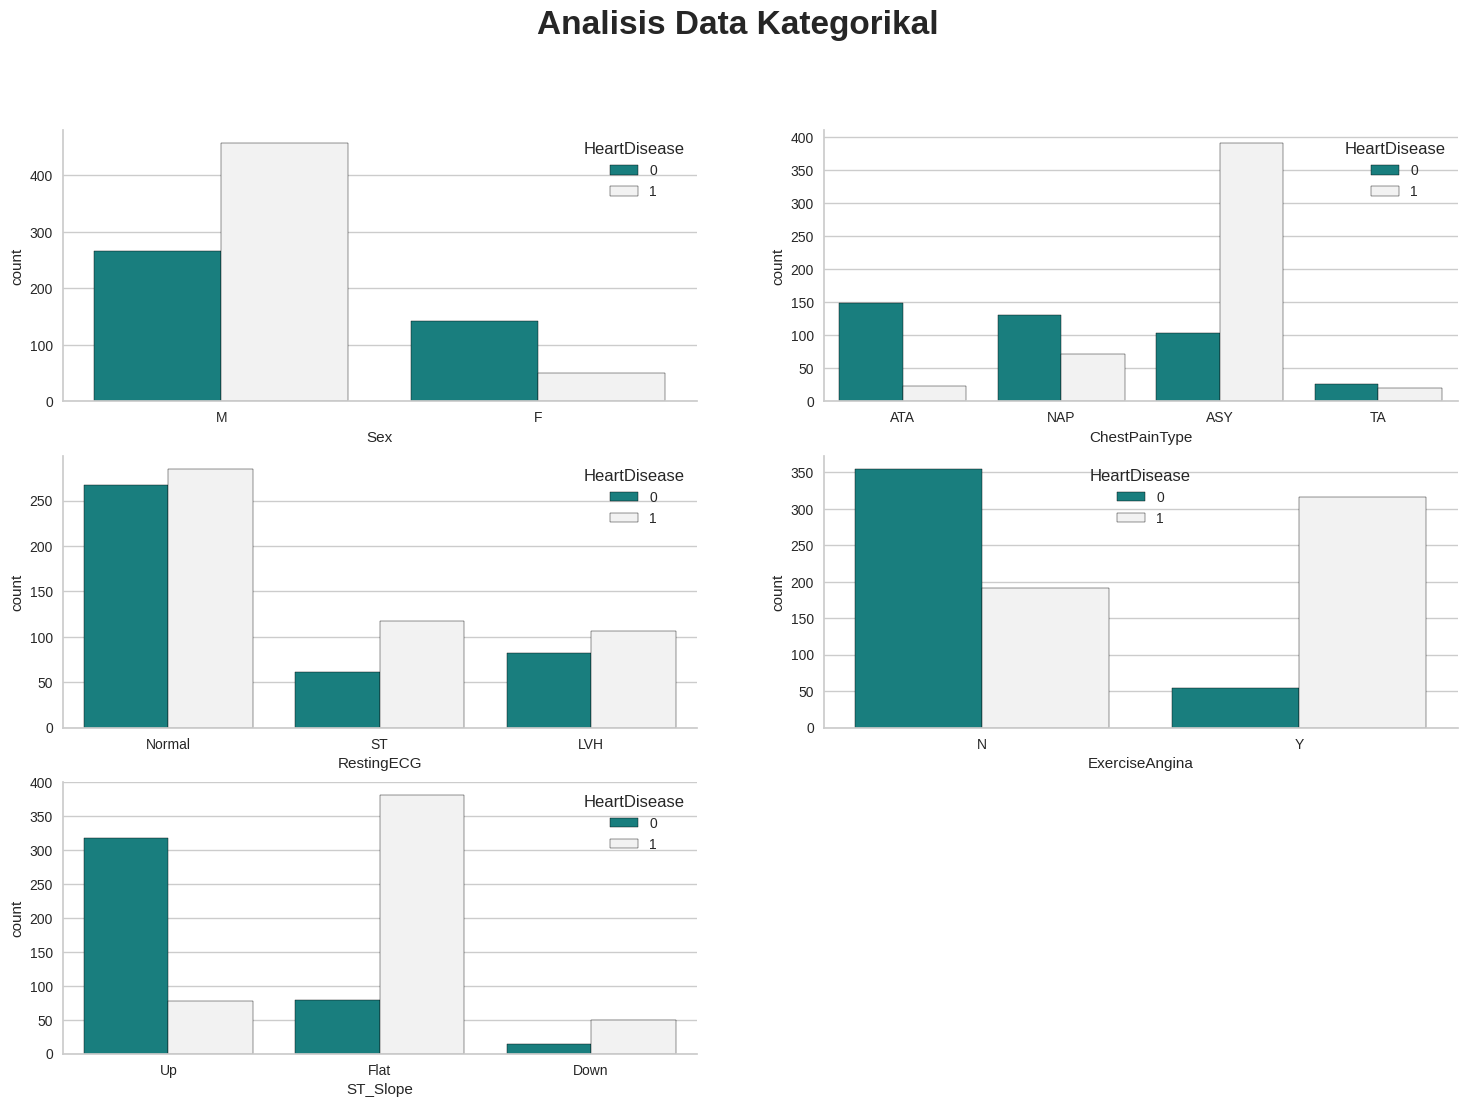

In [ ]:
# -- Konfigurasi Warna --
colors = ['#088F8F', '#F2F2F2']

# -- Figur --
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(3,2)
plt.suptitle("Analisis Data Kategorikal", fontweight='heavy', fontsize='24')

# -- Bar Chart --
ax_sex = fig.add_subplot(gs[0,0])
sns.countplot(x='Sex', hue='HeartDisease', data=df, ax=ax_sex, palette=colors, edgecolor='#000000')
sns.despine()

ax_chestpaintype = fig.add_subplot(gs[0,1])
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, ax=ax_chestpaintype, palette=colors, edgecolor='#000000')
sns.despine()

ax_restingecg = fig.add_subplot(gs[1,0])
sns.countplot(x='RestingECG', hue='HeartDisease', data=df, ax=ax_restingecg, palette=colors, edgecolor='#000000')
sns.despine()

ax_exerciseangina = fig.add_subplot(gs[1,1])
sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=df, ax=ax_exerciseangina, palette=colors, edgecolor='#000000')
sns.despine()

ax_stslope = fig.add_subplot(gs[2,0])
sns.countplot(x='ST_Slope', hue='HeartDisease', data=df, ax=ax_stslope, palette=colors, edgecolor='#000000')
sns.despine()

plt.show()

Kesimpulan:
1. Sebagian besar penderita penyakit
kardiovaskular adalah laki-laki.
2. Pasien yang tidak mengalami gejala nyeri apapun pada dadanya mempunyai chance paling besar terhadap penyakit kardiovaskular.
3. sebagian besar pasien memiliki hasil resting EKG normal.
4. Pasien yang tidak mengalami Angina memiliki peluang lebih besar untuk tidak terkena penyakit kardiovaskular.
5. Pasien dengan sesi latihan dengan kemiringan puncak mendatar cenderung memiliki penyakit jantung.

## Data Numerikal
1. Age
2. Cholesterol
3. RestingBP
4. Oldpeak

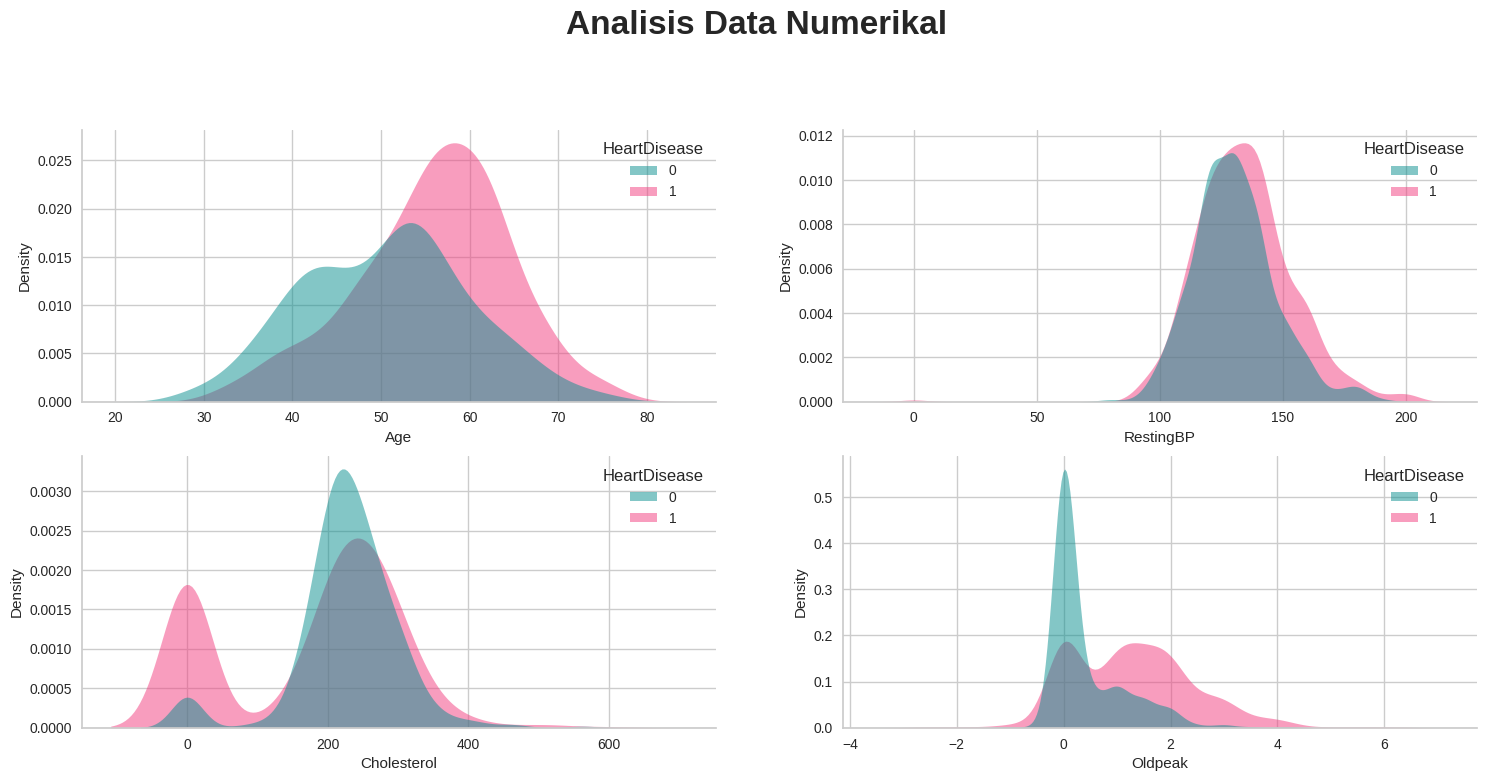

In [ ]:
# -- Konfigurasi Warna --
colors = ['#088F8F', '#F23D7F']

# -- Figur --
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(3,2)
plt.suptitle("Analisis Data Numerikal", fontweight='heavy', fontsize='24')

# -- KDE Plot --
ax_age = fig.add_subplot(gs[0,0])
sns.kdeplot(x='Age', hue='HeartDisease', data=df,  alpha=0.5, linewidth=0, ax=ax_age, palette=colors, fill=True)
sns.despine()

ax_restingbp = fig.add_subplot(gs[0,1])
sns.kdeplot(x='RestingBP', hue='HeartDisease', data=df,  alpha=0.5, linewidth=0, ax=ax_restingbp, palette=colors, fill=True)
sns.despine()

ax_cholesterol = fig.add_subplot(gs[1,0])
sns.kdeplot(x='Cholesterol', hue='HeartDisease', data=df,  alpha=0.5, linewidth=0, ax=ax_cholesterol, palette=colors, fill=True)
sns.despine()

ax_oldpeak = fig.add_subplot(gs[1,1])
sns.kdeplot(x='Oldpeak', hue='HeartDisease', data=df,  alpha=0.5, linewidth=0, ax=ax_oldpeak, palette=colors, fill=True)
sns.despine()

plt.show()

Kesimpulan :
1. Sebagian besar pasien yang menderita penyakit kardiovaskular berkisar sekitar 50-65 tahun.
2. Sebagian besar penderita memiliki tekanan darah di atas normal (120 mmHg).
3. Sebagian besar penderita memiliki kadar kolesterol yang tinggi dan di atas normal (200 mm/dL).
4. Orang yang tidak menderita penyakit jantung cenderung memiliki nilai oldpeak 0.

<ipython-input-10-e4fe5a917a29>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=df, palette=colors, edgecolor='#000000')


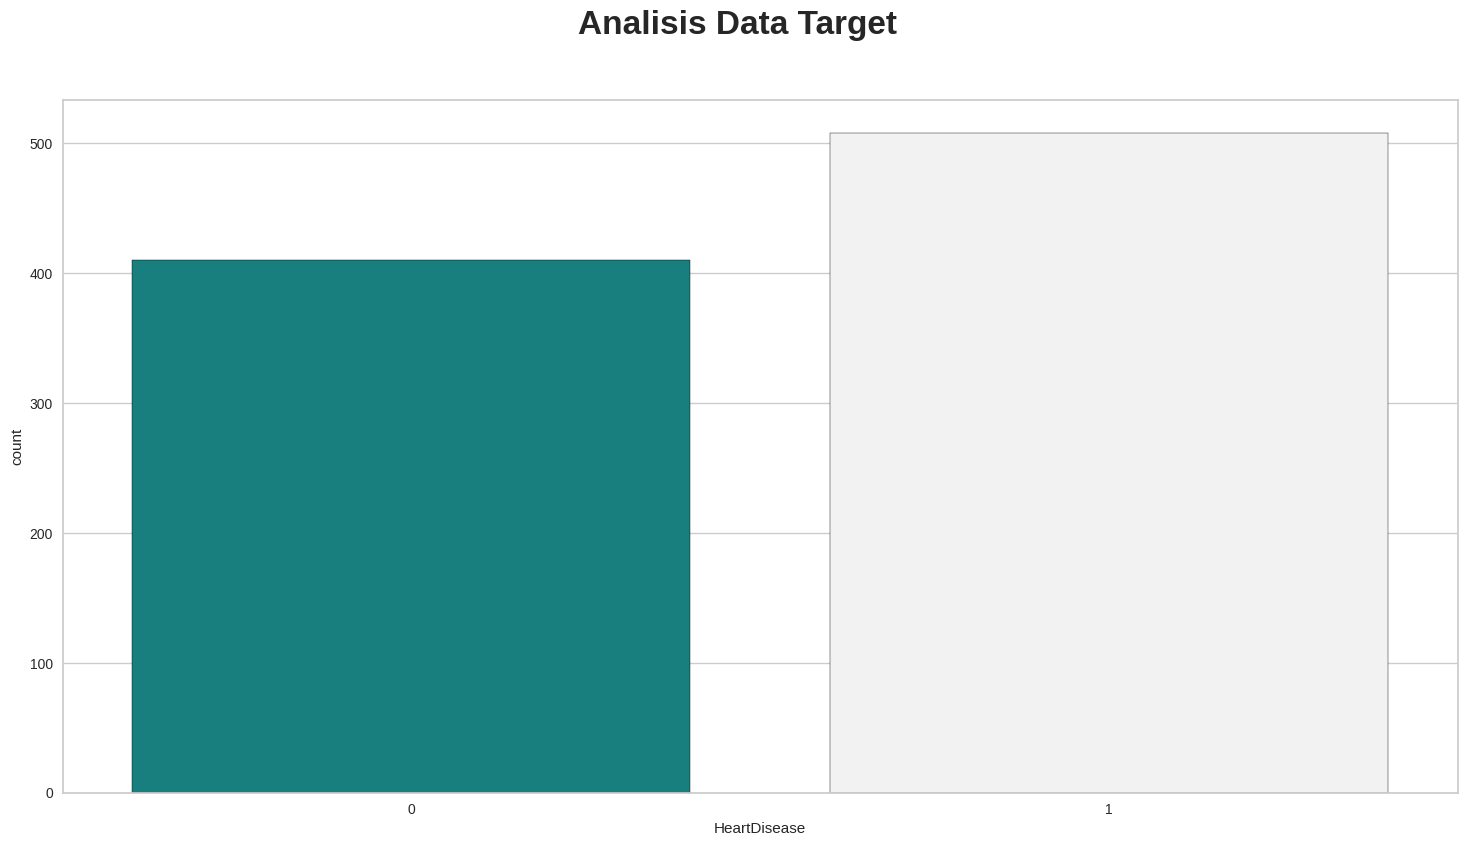

In [ ]:
# -- Konfigurasi Warna --
colors = ['#088F8F', '#F2F2F2']

# -- Figur --
plt.figure(figsize=(18,9))
plt.suptitle("Analisis Data Target", fontweight='heavy', fontsize='24')

# -- Bar Chart --
sns.countplot(x='HeartDisease', data=df, palette=colors, edgecolor='#000000')

plt.show()

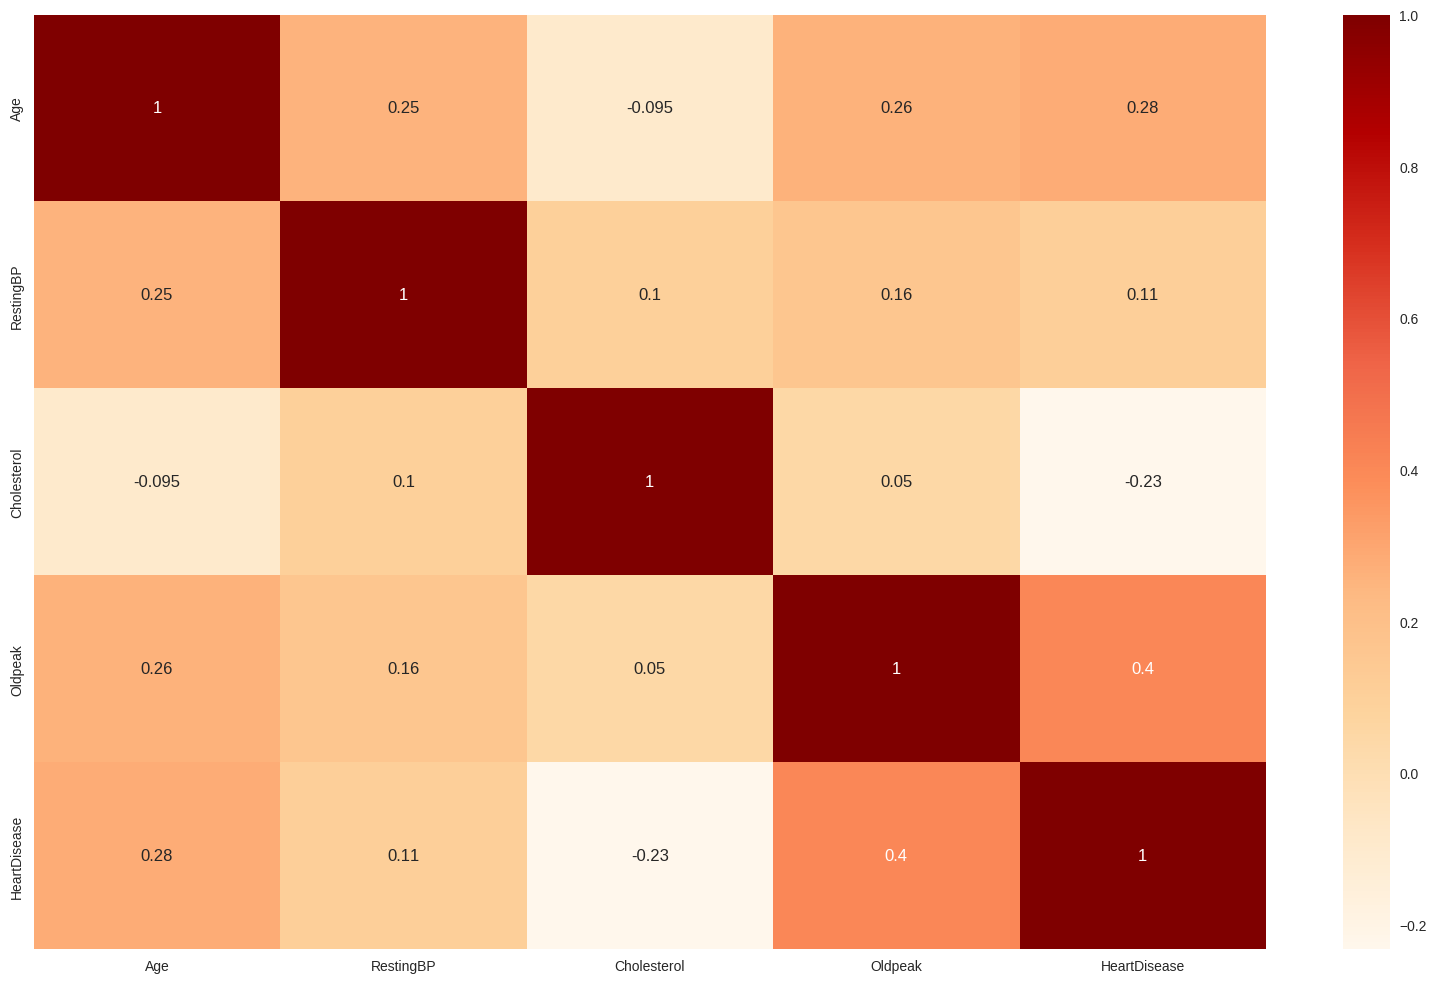

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='OrRd')
plt.tight_layout()
plt.show()

# Data Pre-Processing

## One Hot Encoding

In [ ]:
# Membuat data dummy untuk nilai kategorikal
sex = pd.get_dummies(df['Sex'], prefix='Sex', dtype='int64')
chestpaintype = pd.get_dummies(df['ChestPainType'], prefix='ChestPainType', dtype='int64')
restingecg = pd.get_dummies(df['RestingECG'], prefix='RestingECG', dtype='int64')
exerciseangina = pd.get_dummies(df['ExerciseAngina'], prefix='ExerciseAngina', dtype='int64')
stslope = pd.get_dummies(df['ST_Slope'], prefix='ST_Slope', dtype='int64')

frames = [df, sex, chestpaintype, restingecg, exerciseangina, stslope]
enc_df = pd.concat(frames, axis=1)

enc_df.head().style.background_gradient(cmap='OrRd').hide()

Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
40,M,ATA,140,289,Normal,N,0.000000,Up,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
49,F,NAP,160,180,Normal,N,1.000000,Flat,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
37,M,ATA,130,283,ST,N,0.000000,Up,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
48,F,ASY,138,214,Normal,Y,1.500000,Flat,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
54,M,NAP,150,195,Normal,N,0.000000,Up,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [ ]:
# Menghapus nilai kategorikal
enc_df = enc_df.drop(columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
enc_df.head().style.background_gradient(cmap='OrRd').hide()

Age,RestingBP,Cholesterol,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
40,140,289,0.000000,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
49,160,180,1.000000,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
37,130,283,0.000000,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
48,138,214,1.500000,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
54,150,195,0.000000,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


## Memisahkan fitur

In [ ]:
# Fitur untuk pengecekan
x = enc_df.drop(['HeartDisease'], axis=1)

# Fitur untuk Hasil (Label)
y = enc_df['HeartDisease']

## Standarisasi Data

In [ ]:
x = StandardScaler().fit_transform(x)
print(x)

[[-1.4331398   0.41090889  0.82507026 ... -0.27144836 -1.00218103
   1.15067399]
 [-0.47848359  1.49175234 -0.17196105 ... -0.27144836  0.99782372
  -0.86905588]
 [-1.75135854 -0.12951283  0.7701878  ... -0.27144836 -1.00218103
   1.15067399]
 ...
 [ 0.37009972 -0.12951283 -0.62016778 ... -0.27144836  0.99782372
  -0.86905588]
 [ 0.37009972 -0.12951283  0.34027522 ... -0.27144836  0.99782372
  -0.86905588]
 [-1.64528563  0.30282455 -0.21769643 ... -0.27144836 -1.00218103
   1.15067399]]


## Pemisahan Data Train dan Data Test

In [ ]:
# Menggunakan 20% Data Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Melihat Data
print("Jumlah data train:", len(x_train))
print("Jumlah data test:", len(x_test))

print("Statistik Data Train:")
print(pd.DataFrame(x_train, y_train).describe())
print("\nStatistik Data Test:")
print(pd.DataFrame(x_test, y_test).describe())

Jumlah data train: 734
Jumlah data test: 184
Statistik Data Train:
               0           1           2           3           4           5   \
count  734.000000  734.000000  734.000000  734.000000  734.000000  734.000000   
mean     0.014886    0.036074    0.008089    0.016583    0.039066   -0.039066   
std      0.993297    0.996480    0.989868    1.015913    1.027361    1.027361   
min     -2.599942   -7.154995   -1.818435   -3.271482   -0.515952   -1.938163   
25%     -0.690629   -0.669935   -0.199402   -0.832432   -0.515952    0.515952   
50%      0.051881   -0.129513    0.221363   -0.269575   -0.515952    0.515952   
75%      0.688318    0.410909    0.642129    0.574711   -0.515952    0.515952   
max      2.491558    3.653439    3.697252    4.983762    1.938163    0.515952   

               6           7           8           9           10          11  \
count  734.000000  734.000000  734.000000  734.000000  734.000000  734.000000   
mean     0.012072    0.002353   -0.001023

# DECISION TREE CLASIFIER

## Model

In [ ]:
# Model Fit
dt_clf = DecisionTreeClassifier(max_depth=4, random_state=0)
dt_clf.fit(x_train, y_train)

y_pred_dt = dt_clf.predict(x_test)

In [ ]:
# Cek Akurasi
dt_acc = accuracy_score(y_pred_dt, y_test)
print('Akurasi Model Decision Tree Classifier: '+'{:.2f}'.format(dt_acc*100)+'\n')

print('Classification Report\n')
print(classification_report(y_test, y_pred_dt))

Akurasi Model Decision Tree Classifier: 88.04

Classification Report

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



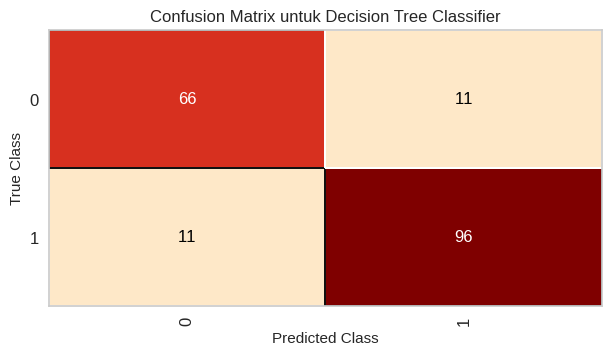

In [ ]:
# -- Figur --
fig = plt.figure(figsize=(12,10))

# -- Confusion Matrix --
ax_cm = fig.add_subplot(gs[0,0])
dt_cm = ConfusionMatrix(dt_clf, ax=ax_cm, cmap='OrRd', title='Confusion Matrix untuk Decision Tree Classifier')
dt_cm.fit(x_train, y_train)
dt_cm.score(x_test, y_test)
dt_cm.finalize()

plt.tight_layout()
plt.show()

In [ ]:
# -- Men-generate data secara random --
test = [[-0.22, -0.490, 1.038,              ## Age, RestingBP, Cholesterol
         0.301, 0, 1, 0, 0,                 ## Oldpeak, Sex_F, Sex_M, ChestPainType_ASY, ChestPainType_ATA
         0, 1, 0, 0, 1,                     ## ChestPainType_NAP, ChestPainType_TA, RestingECG_LVH, RestingECG_Normal, RestingECG_ST
         0, 1, 0, 0, 1                      ## ExerciseAngina_N, ExerciseAngina_Y, ST_Slope_Down, ST_Slope_Flat, ST_Slope_Up
        ]]

result = dt_clf.predict(test)

if result[0] == 1:
    print('Terdeteksi Penyakit Jantung!')
else:
    print('Tidak Terdeteksi Penyakit Jantung!')

Terdeteksi Penyakit Jantung!


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

# Fitur Prediksi
X = enc_df.drop(['HeartDisease'], axis=1)

# Fitur Output
y = enc_df['HeartDisease']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_clf = DecisionTreeClassifier(max_depth=4, random_state=0)
dt_clf.fit(X_train, y_train)

feature_names = X.columns.tolist()
dt_data = export_graphviz(dt_clf, out_file=None,
                          feature_names=feature_names,
                          class_names=['0', '1'],
                          filled=True)
graph = graphviz.Source(dt_data)
graph.render("decision_tree_f")

# -- Men-generate 1 Data --
test = [[48, 138, 214,                      ## Age, RestingBP, Cholesterol
         1.5, 1, 1, 0, 0,                   ## Oldpeak, Sex_F, Sex_M, ChestPainType_ASY, ChestPainType_ATA
         0, 0, 0, 1, 0,                     ## ChestPainType_NAP, ChestPainType_TA, RestingECG_LVH, RestingECG_Normal, RestingECG_ST
         0, 1, 0, 1, 0                      ## ExerciseAngina_N, ExerciseAngina_Y, ST_Slope_Down, ST_Slope_Flat, ST_Slope_Up
        ]]

result = dt_clf.predict(test)

if result[0] == 1:
    print('Terdeteksi Penyakit Jantung!')
else:
    print('Tidak Terdeteksi Penyakit Jantung!')

Terdeteksi Penyakit Jantung!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
